# 🌡️ Visualizing Annual Temperatures – Plovdiv (42.17°N, 24.75°E)

## A Sample Climate Data Visualization Jupyter Notebook
*Teaching with Open Climate Data in Mathematics, Informatics & Geography - An Interdisciplinary Model*

This notebook explores annual temperature trends in Plovdiv from 1940 to 2024 using open Copernicus climate data. The data is visualized with a line chart (including a smoothed trend) and a calendar heatmap.

### 📦 Step 1: Import Required Libraries
In the first step we have to import Python packages used for data handling, plotting, and numerical operations.

#### 🧠 Student Task:
- *What do each of the libraries (`pandas`, `numpy`, `matplotlib`) help us do in this notebook?*
- *Try importing an additional library like `seaborn`. What is it used for?*


In [21]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### 📂 Step 2: Load and Inspect the CSV File
Let’s read and preview the structure of the climate data file. This helps us understand how to extract useful information from it.

#### 🧠 Student Task:
- *What kind of file structure is used here? Is it a traditional table?*
- *Which lines contain the actual data values we need to visualize?*

In [22]:
with open("D:\\Dropbox\\01_SOFIA_UNIVERSITY\\01_Documents\\04_SUMMIT\\Paper-climate-interdisciplinary-lessons\\Data-JupyterNotebooks\\Temperature_annual_timeseries_42.17N24.75E-Plovdiv.csv", "r", encoding="utf-8") as f:
    for i in range(5):
        print(f.readline())

Grid point ERA5 data downloaded from the ERA Explorer. ERA Explorer is built and maintained by ECMWF in conjunction with the Copernicus Climate Change Service and the European Union

Variable name,Temperature annual timeseries

Year,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024

Values,10.873870849609375,10.769805908203125,11.10284423828125,12.08270263671875,11.25579833984375,12.0533447265625,12.470306396484375,12.690887451171875,12.0118408203125,12.01263427734375,13.05950927734375,12.68963623046875,13.277923583984375,11.7998046875,11.45855712890625,12.163055419921875,11.501708984375,12.269287109375,12.92309570312

### 🧮 Step 3: Parse the Data into a DataFrame
We extract the years and corresponding annual temperatures, then store them in a structured format using a DataFrame.

#### 🧠 Student Task:
- *Why do we use `.split(",")[1:]` to remove the first column?*
- *What advantages does using a DataFrame give us in data analysis?*

In [23]:
# Set the confirmed correct path
file_path = "D:\\Dropbox\\01_SOFIA_UNIVERSITY\\01_Documents\\04_SUMMIT\\Paper-climate-interdisciplinary-lessons\\Data-JupyterNotebooks\\Temperature_annual_timeseries_42.17N24.75E-Plovdiv.csv"

# Read the necessary lines from the file
with open(file_path, "r", encoding="utf-8") as f:
    lines = f.readlines()

# Extract the years and temperature values from lines 3 and 4
years = lines[2].strip().split(",")[1:]         # Remove "Year"
temperatures = lines[3].strip().split(",")[1:]  # Remove "Values"

# Convert to correct types
years = [int(year) for year in years]
temperatures = [float(temp) for temp in temperatures]

# Create DataFrame
import pandas as pd

df = pd.DataFrame({
    "Year": years,
    "Temperature": temperatures
})

# Preview the result
df.head()


,Year,Temperature
0,1940,10.873871
1,1941,10.769806
2,1942,11.102844
3,1943,12.082703
4,1944,11.255798


### 📊 Step 4: Calculate a 10-Year Rolling Average
To better understand long-term climate trends, we calculate a smoothed rolling average over a 10-year window.

#### 🧠 Student Task:
- *Why is smoothing useful when analyzing climate data?*
- *Try changing the window from 10 to 5. How does the line change?*

In [24]:
# Calculate a 10-year rolling average (centered)
df["RollingMean"] = df["Temperature"].rolling(window=10, center=True).mean()

# Preview with the new column
df.head(12)


,Year,Temperature,RollingMean
0,1940,10.873871,NaN
1,1941,10.769806,NaN
2,1942,11.102844,NaN
3,1943,12.082703,NaN
4,1944,11.255798,NaN
5,1945,12.053345,11.732404
6,1946,12.470306,11.950967
7,1947,12.690887,12.142950
8,1948,12.011841,12.360458
9,1949,12.012634,12.332169


### 📈 Step 5: Plot the Annual Temperatures and Trend Line
Here we visualize both the original annual temperatures and the smoothed trend line to compare short-term fluctuations with long-term patterns.

#### 🧠 Student Task:
- *Identify a period of rapid temperature change. What might have caused it?*
- *Can you relate the changes in this graph to climate trends in Bulgaria?*

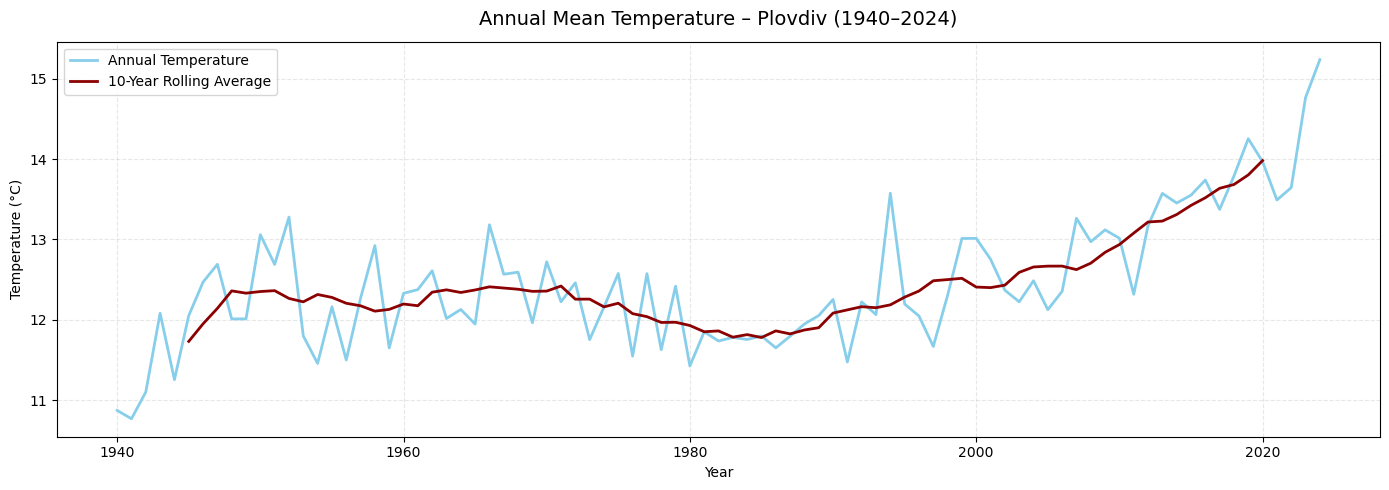

In [25]:
import matplotlib.pyplot as plt

# Create the line chart
plt.figure(figsize=(14, 5))

plt.plot(df["Year"], df["Temperature"], label="Annual Temperature", color="skyblue", linewidth=2)
plt.plot(df["Year"], df["RollingMean"], label="10-Year Rolling Average", color="darkred", linewidth=2)

plt.title("Annual Mean Temperature – Plovdiv (1940–2024)", fontsize=14, pad=12)
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.grid(True, linestyle="--", alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


### 📁 Step 6: Export the visual as PNG
We save the line chart as high-resolution image that can be used in reports, presentations, or educational materials.

#### 🧠 Student Task:
- *Where does Python save these images by default? Can you change the filename or folder?*
- *Try using a different DPI value when saving. What effect does it have on the image quality?*


In [30]:
# Save the PNG
plt.savefig("plovdiv_temperature_line_chart.png", dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

### 🟨 Step 7: Create a Calendar-Style Heatmap
This heatmap presents annual temperatures as a grid, with years grouped by decade, helping us spot patterns visually.

#### 🧠 Student Task:
- *Which decades appear warmest and which coolest?*
- *How does the calendar layout affect your interpretation of temperature trends?*
- *Can you create a similar heatmap using another climate variable (e.g. precipitation)?*

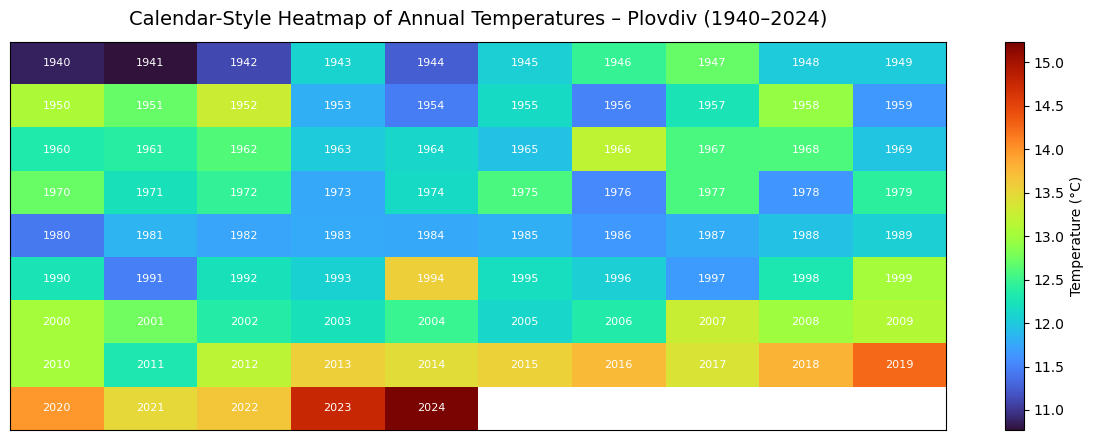

In [29]:
# Extract data from DataFrame
years = df["Year"].values
temps = df["Temperature"].values

# Set grid layout: one row = one decade, 10 columns = 10 years
n_cols = 10
n_rows = int(np.ceil(len(years) / n_cols))

# Pad the data to fill the grid shape
padded_temps = np.append(temps, [np.nan] * (n_rows * n_cols - len(temps)))
padded_years = np.append(years, [np.nan] * (n_rows * n_cols - len(years)))

# Reshape into 2D arrays
temp_grid = padded_temps.reshape(n_rows, n_cols)
year_grid = padded_years.reshape(n_rows, n_cols)

# Plot the heatmap grid
fig, ax = plt.subplots(figsize=(12, 4.5))
cmap = plt.cm.turbo  # You can change to 'coolwarm', 'inferno', etc.
heatmap = ax.imshow(temp_grid, aspect="auto", cmap=cmap, interpolation="none")

# Annotate each cell with its year
for i in range(n_rows):
    for j in range(n_cols):
        if not np.isnan(year_grid[i, j]):
            ax.text(j, i, str(int(year_grid[i, j])), ha='center', va='center', fontsize=8, color='white')

# Style settings
ax.set_xticks([])
ax.set_yticks([])
plt.title("Calendar-Style Heatmap of Annual Temperatures – Plovdiv (1940–2024)", fontsize=14, pad=12)
plt.colorbar(heatmap, label="Temperature (°C)")
plt.tight_layout()
plt.show()


### 📁 Step 8: Export the visua as PNG
We save the heatmap as high-resolution image that can be used in reports, presentations, or educational materials.

#### 🧠 Student Task:
- *What benefits has this type of visualization over the line chart?*
- *What trends can you spot when analyzing the resultig image?*


In [28]:
# Save as PNG
plt.savefig("plovdiv_calendar_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

<Figure size 640x480 with 0 Axes>

### 🏥 Reflection on Climate Change, Urban Heat, and Public Health

#### 🧠 Student Task:
Based on the temperature trends and visualizations you generated for Plovdiv, how might rising temperatures affect human health in the region?  
Which groups in society (e.g. children, elderly, outdoor workers) are most vulnerable to heat-related impacts?

From a geographical and urban planning perspective, what can Plovdiv’s local government do to reduce the risks of extreme heat in the city?

📝 **Prepare a **mini-presentation** proposing one specific strategy that Plovdiv could adopt to reduce urban heat risk in the coming decades.**
